Installing Dependencies



In [2]:
# Install necessary dependencies
!pip install keras matplotlib seaborn tensorflow scikit-learn

Importing Libraries

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


Step 1: Create Synthetic Data

In [4]:
# Step 1: Create synthetic data
np.random.seed(42)

latency = np.random.uniform(1, 100, 1000)
throughput = np.random.uniform(10, 1000, 1000)
signal_strength = np.random.uniform(-120, -40, 1000)
user_density = np.random.uniform(10, 1000, 1000)
bandwidth = np.random.uniform(5, 100, 1000)
packet_loss_rate = np.random.uniform(0, 5, 1000)
device_type = np.random.choice(['Smartphone', 'IoT', 'AR/VR'], size=1000)

network_slice = []
for i in range(1000):
    if latency[i] < 10 and throughput[i] > 500:
        network_slice.append("eMBB")
    elif latency[i] > 50 and user_density[i] > 500:
        network_slice.append("URLLC")
    else:
        network_slice.append("mMTC")

df = pd.DataFrame({
    'Latency (ms)': latency,
    'Throughput (Mbps)': throughput,
    'Signal Strength (dBm)': signal_strength,
    'User Density (users/km²)': user_density,
    'Available Bandwidth (MHz)': bandwidth,
    'Packet Loss Rate (%)': packet_loss_rate,
    'Device Type': device_type,
    'Network Slice': network_slice
})
df['Device Type'] = LabelEncoder().fit_transform(df['Device Type'])

Step 2: Preprocess Data

In [5]:
# Step 2: Preprocess data
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
scaler = StandardScaler()
X[:, :-1] = scaler.fit_transform(X[:, :-1])
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)
dummy_y = to_categorical(encoded_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.3, random_state=42)


Step 3: Define and Train CNN Model

In [6]:
# Step 3: CNN-based model
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    Dropout(0.3),
    Conv1D(64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

history = model.fit(X_train_cnn, Y_train, validation_split=0.2, epochs=20, batch_size=128)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.3217 - loss: 1.0985 - val_accuracy: 0.7500 - val_loss: 0.9411
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7347 - loss: 0.8992 - val_accuracy: 0.7429 - val_loss: 0.7719
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7035 - loss: 0.7668 - val_accuracy: 0.7429 - val_loss: 0.6360
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7192 - loss: 0.6623 - val_accuracy: 0.7429 - val_loss: 0.5645
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7078 - loss: 0.6282 - val_accuracy: 0.7786 - val_loss: 0.5262
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7605 - loss: 0.5923 - val_accuracy: 0.8643 - val_loss: 0.4973
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7972 - loss: 0.5616 - val_accuracy: 0.8429 - val_loss: 0.4610
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8038 - loss: 0.5202 - val_accuracy: 0.8429 - val_loss: 0.4294

Step 4: Evaluate the Model

In [7]:
# Step 4: Evaluate the model
scores = model.evaluate(X_test_cnn, Y_test)
print("\nAccuracy: %.2f%%" % (scores[1] * 100))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8918 - loss: 0.2396 

Accuracy: 90.67%


Step 5: Visualize Training and Validation Metrics

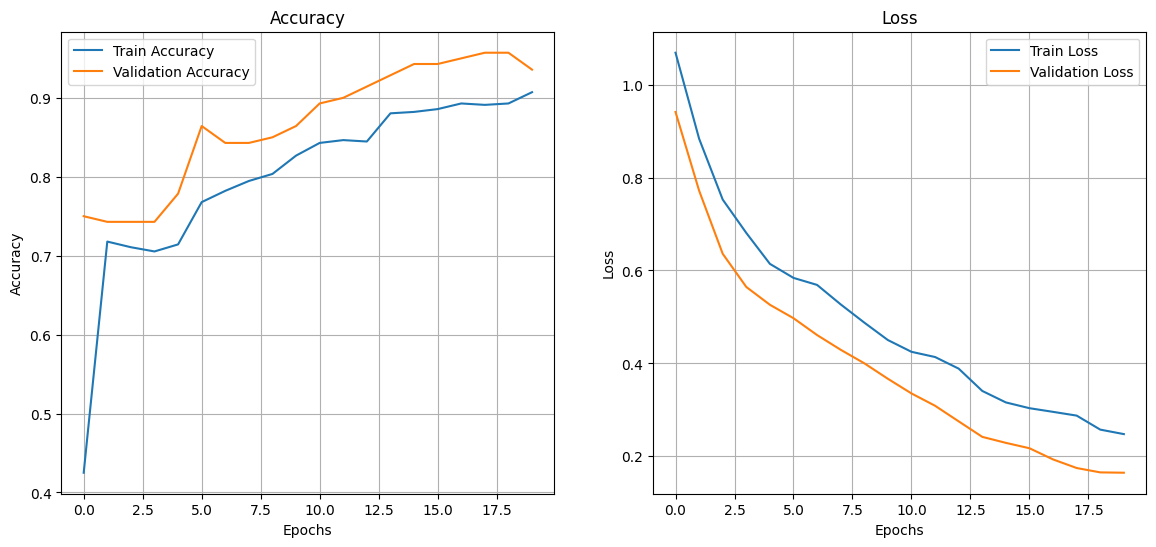

In [8]:
# Plot Accuracy and Loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Step 6: Generate Confusion Matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


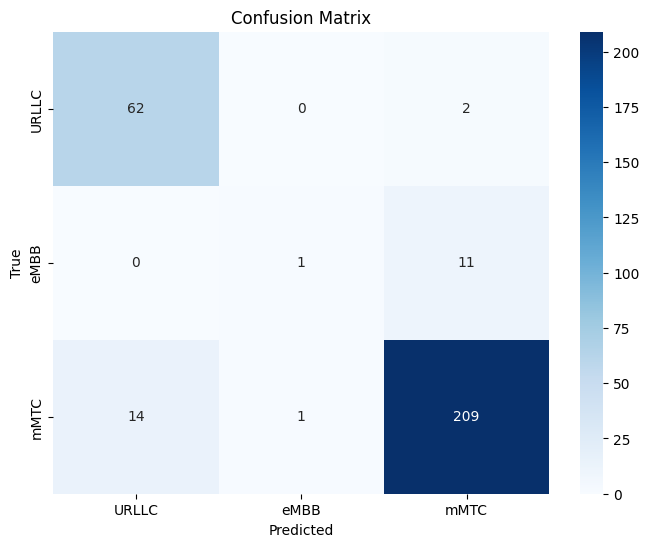

In [9]:
# Confusion Matrix
Y_pred = model.predict(X_test_cnn)
Y_pred_class = np.argmax(Y_pred, axis=1)
Y_test_class = np.argmax(Y_test, axis=1)

cm = confusion_matrix(Y_test_class, Y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Step 7: Generate Classification Report

In [10]:
# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test_class, Y_pred_class, target_names=encoder.classes_))



Classification Report:
              precision    recall  f1-score   support

       URLLC       0.82      0.97      0.89        64
        eMBB       0.50      0.08      0.14        12
        mMTC       0.94      0.93      0.94       224

    accuracy                           0.91       300
   macro avg       0.75      0.66      0.66       300
weighted avg       0.90      0.91      0.89       300



Step 8: Plot ROC Curves

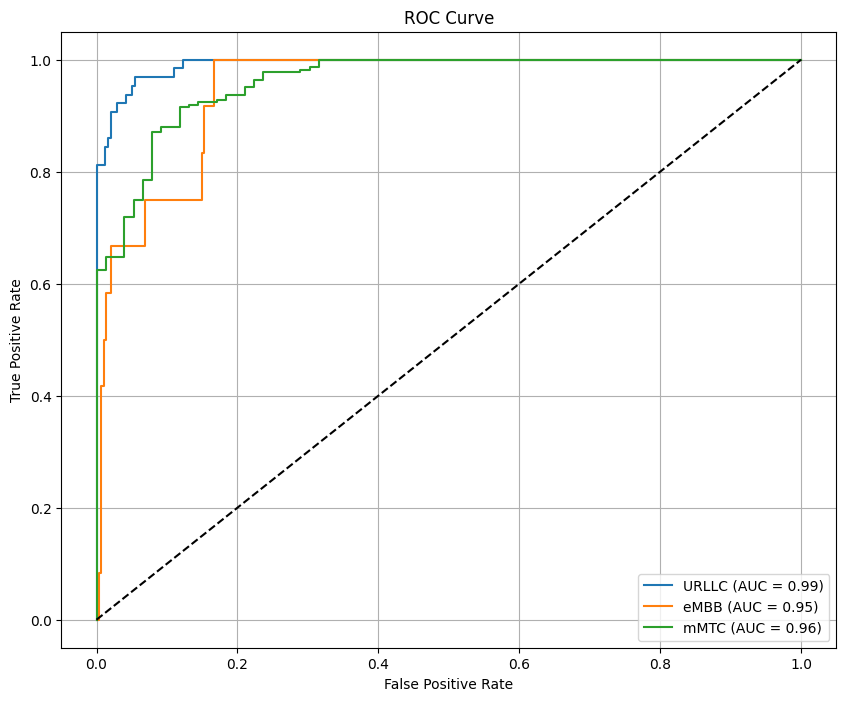

In [11]:
# ROC Curves
plt.figure(figsize=(10, 8))
for i in range(3):
    fpr, tpr, _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{encoder.classes_[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


Step 9: Plot Pairwise Feature Interactions

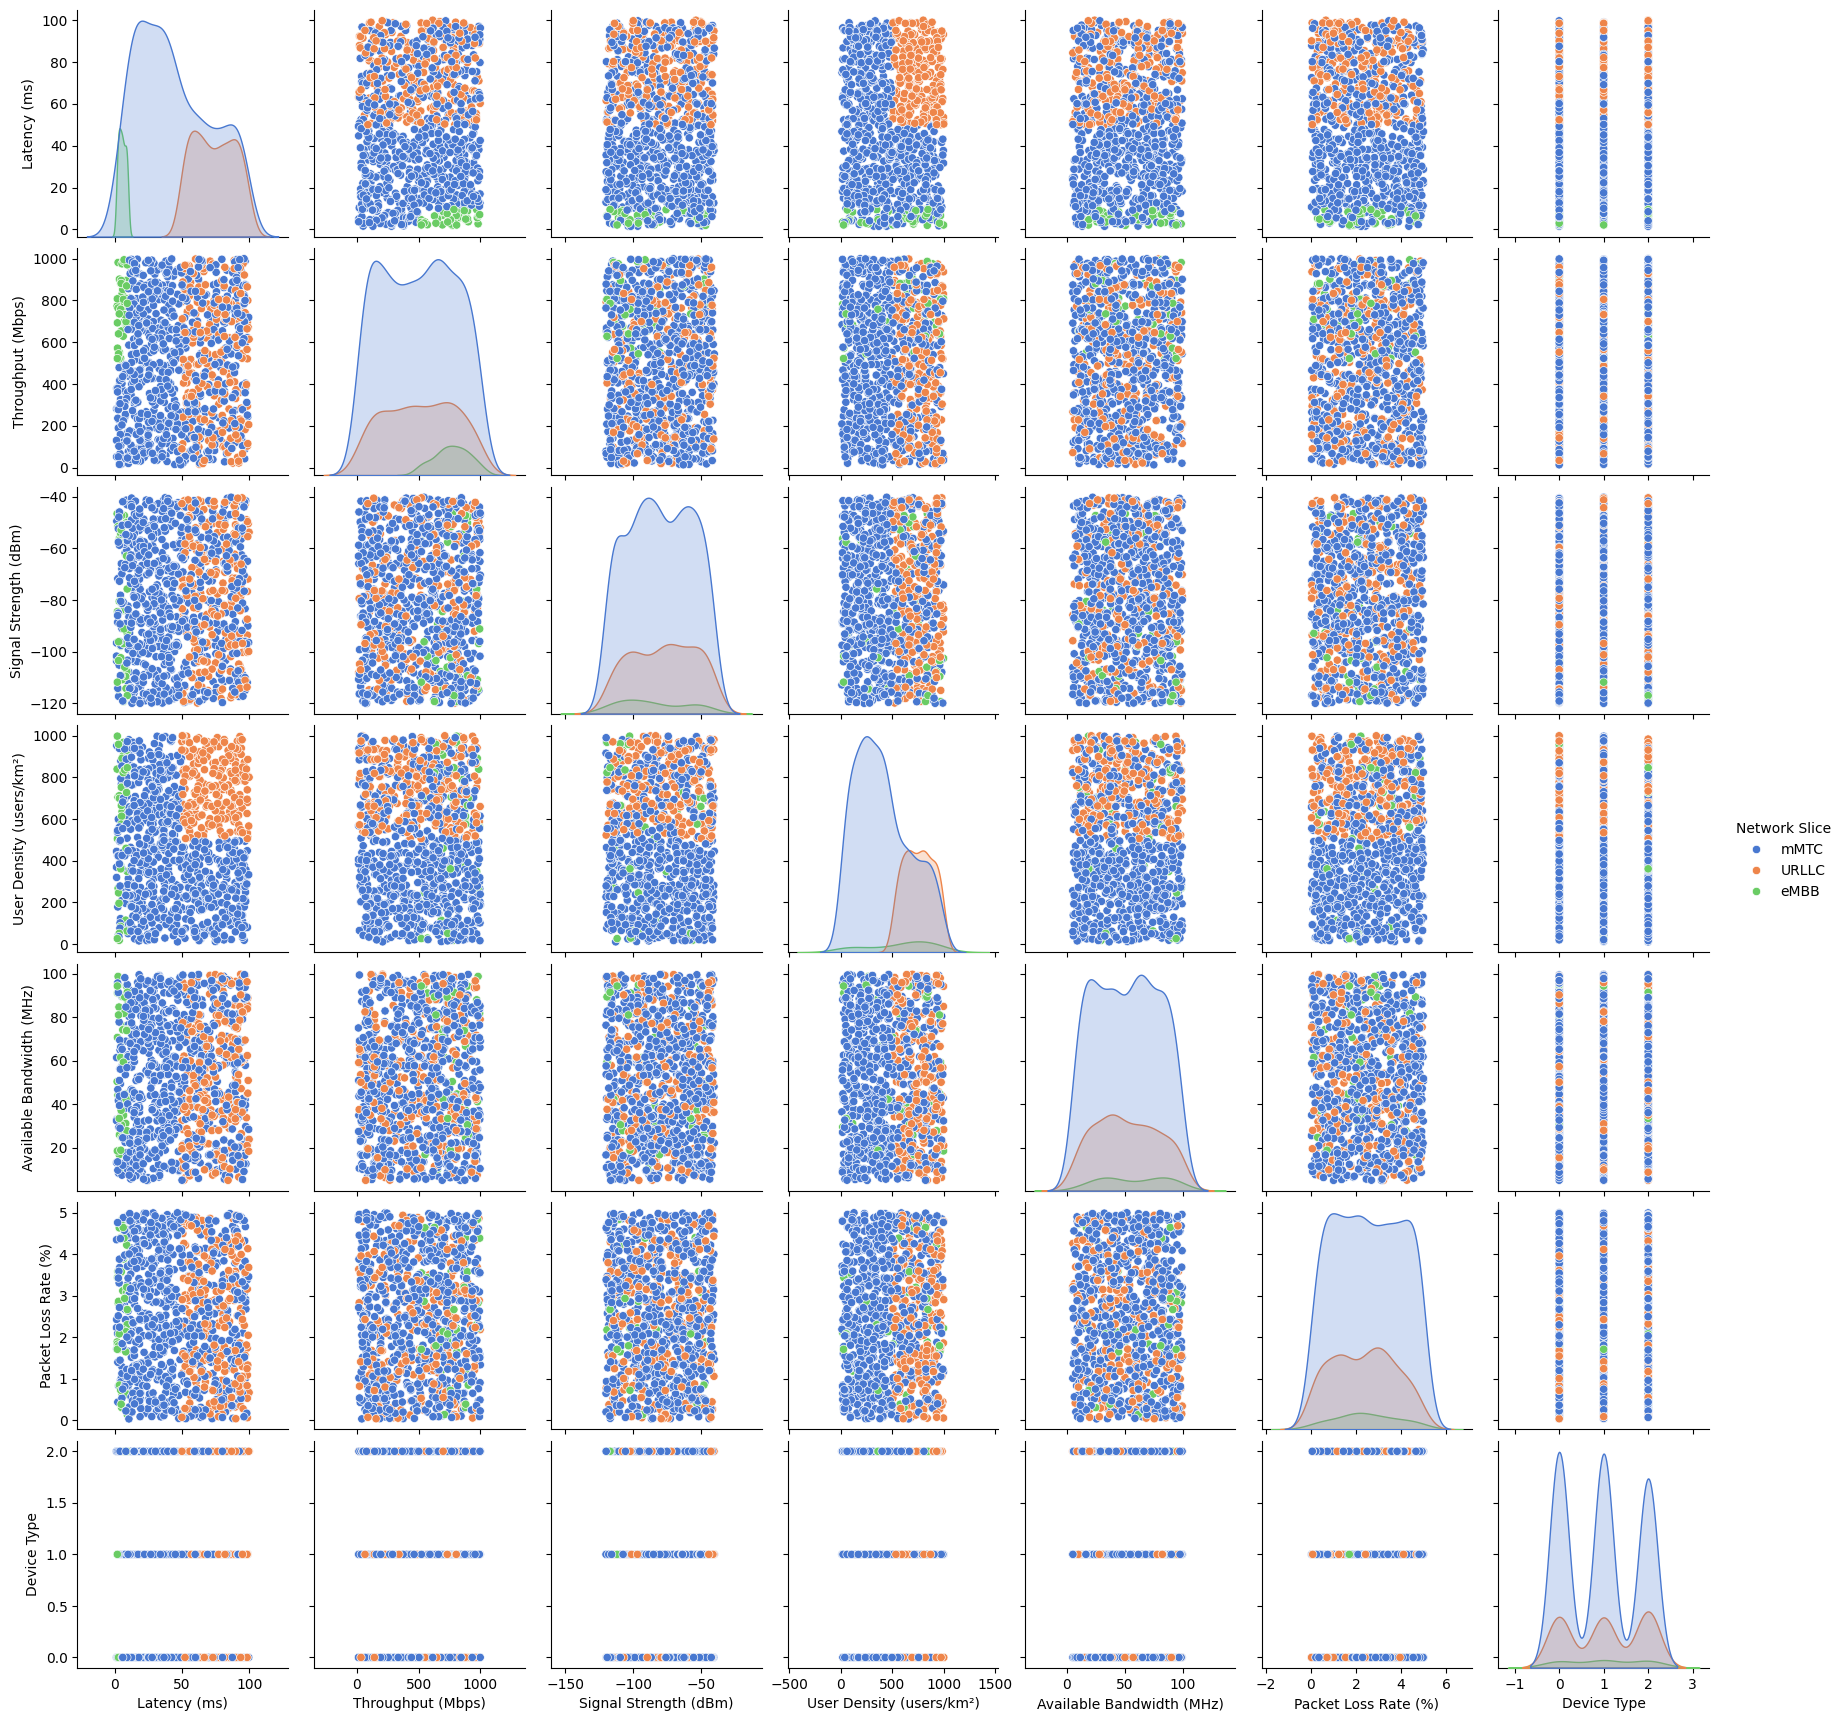

In [12]:
# Pair Plot with KDE
sns.pairplot(df, hue='Network Slice', palette='muted', diag_kind='kde')
plt.show()


Step 10: Simulated Resource Utilization Heatmap

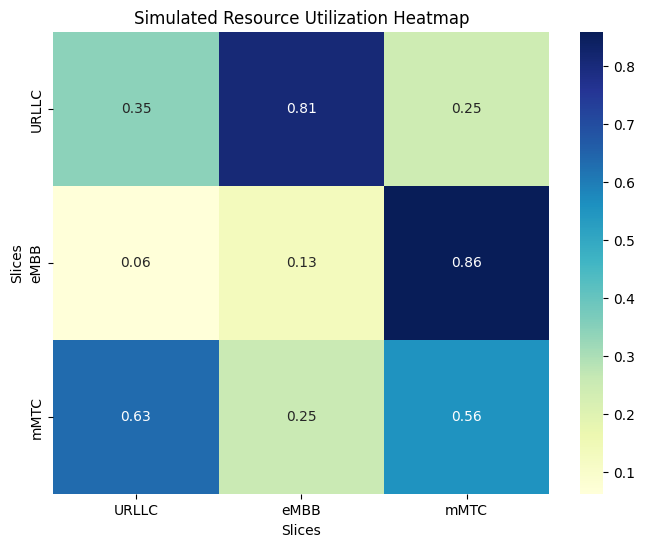

In [13]:
# Simulated Resource Utilization Heatmap
slice_load = np.random.uniform(0, 1, (3, 3))  # Simulated utilization for eMBB, mMTC, URLLC
plt.figure(figsize=(8, 6))
sns.heatmap(slice_load, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Simulated Resource Utilization Heatmap")
plt.xlabel("Slices")
plt.ylabel("Slices")
plt.show()